In [1]:
import pandas as pd

In [16]:
baseball_df = pd.read_csv('baseball_data.csv')

In [17]:
print(baseball_df.head(5))

   Season              Name Team    G   PA  HR    R  RBI  SB    BB%  ...  \
0    2015      Bryce Harper  WSN  153  654  42  118   99   6  19.0%  ...   
1    2018      Mookie Betts  BOS  136  614  32  129   80  30  13.2%  ...   
2    2018        Mike Trout  LAA  140  608  39  101   79  24  20.1%  ...   
3    2019  Christian Yelich  MIL  130  580  44  100   97  30  13.8%  ...   
4    2017        Mike Trout  LAA  114  507  33   92   72  22  18.5%  ...   

     ISO  BABIP    AVG    OBP    SLG    OPS   wOBA  wRC+   WAR  playerid  
0  0.319  0.369  0.330  0.460  0.649  1.109  0.461   197   9.3     11579  
1  0.294  0.368  0.346  0.438  0.640  1.078  0.449   185  10.6     13611  
2  0.316  0.346  0.312  0.460  0.628  1.088  0.447   188   9.5     10155  
3  0.342  0.355  0.329  0.429  0.671  1.100  0.442   174   7.3     11477  
4  0.323  0.318  0.306  0.442  0.629  1.071  0.437   180   6.4     10155  

[5 rows x 21 columns]


In [18]:
baseball_df = baseball_df.drop(columns=['Team'])
baseball_df = baseball_df.rename(columns={'BB%':'BB', 'K%':'K', 'wRC+':'WRCplus'})

In [19]:
baseball_df['BB'] = baseball_df['BB'].str.replace('%', '')
baseball_df['K'] = baseball_df['K'].str.replace('%', '')

In [20]:
print(baseball_df.head(5))

   Season              Name    G   PA  HR    R  RBI  SB    BB     K    ISO  \
0    2015      Bryce Harper  153  654  42  118   99   6  19.0  20.0  0.319   
1    2018      Mookie Betts  136  614  32  129   80  30  13.2  14.8  0.294   
2    2018        Mike Trout  140  608  39  101   79  24  20.1  20.4  0.316   
3    2019  Christian Yelich  130  580  44  100   97  30  13.8  20.3  0.342   
4    2017        Mike Trout  114  507  33   92   72  22  18.5  17.8  0.323   

   BABIP    AVG    OBP    SLG    OPS   wOBA  WRCplus   WAR  playerid  
0  0.369  0.330  0.460  0.649  1.109  0.461      197   9.3     11579  
1  0.368  0.346  0.438  0.640  1.078  0.449      185  10.6     13611  
2  0.346  0.312  0.460  0.628  1.088  0.447      188   9.5     10155  
3  0.355  0.329  0.429  0.671  1.100  0.442      174   7.3     11477  
4  0.318  0.306  0.442  0.629  1.071  0.437      180   6.4     10155  


In [21]:
import matplotlib.pyplot as plt

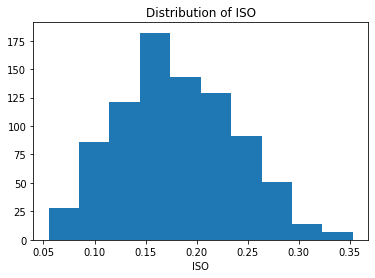

In [22]:
plt.hist(baseball_df['ISO'])
plt.xlabel('ISO')
plt.title('Distribution of ISO')
plt.show()

In [23]:
print(baseball_df['ISO'].mean())

0.1802711267605634


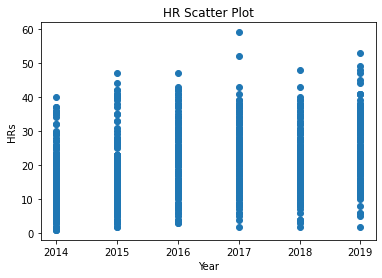

In [25]:
plt.scatter(baseball_df['Season'], baseball_df['HR'])
plt.title('HR Scatter Plot')
plt.xlabel('Year')
plt.ylabel('HRs')
plt.show()

Text(0, 0.5, 'BB%')

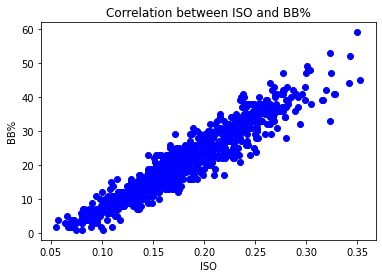

In [28]:
plt.scatter(baseball_df['ISO'], baseball_df['HR'], c = 'blue')
plt.title('Correlation between ISO and HR')
plt.xlabel('ISO')
plt.ylabel('BB%')

In [36]:
baseball_df.corr()['OPS']

Season      0.226637
G           0.122713
PA          0.336695
HR          0.728812
R           0.688532
RBI         0.693239
SB         -0.049708
ISO         0.810926
BABIP       0.383813
AVG         0.616094
OBP         0.835156
SLG         0.959779
OPS         1.000000
wOBA        0.986392
WRCplus     0.947064
WAR         0.750972
playerid    0.117433
Name: OPS, dtype: float64

In [37]:
baseball_df.columns

Index(['Season', 'Name', 'G', 'PA', 'HR', 'R', 'RBI', 'SB', 'BB', 'K', 'ISO',
       'BABIP', 'AVG', 'OBP', 'SLG', 'OPS', 'wOBA', 'WRCplus', 'WAR',
       'playerid'],
      dtype='object')

In [97]:
attributes = ['Season', 'Name', 'G', 'PA', 'HR', 'R', 'RBI', 'SB', 'BB', 'K', 'ISO',
       'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'WRCplus', 'WAR',
       'playerid']

attributes = ['Season', 'G', 'PA', 'HR', 'R', 'RBI', 'SB', 'BB', 'K', 'ISO',
       'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'WRCplus', 'WAR',
       'playerid']

attributes = ['G', 'PA', 'HR', 'R', 'RBI', 'SB', 'BB', 'K', 'ISO',
       'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'WRCplus', 'WAR']

In [44]:
data_attributes = baseball_df[attributes]

In [41]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [45]:
s_score_dict = {}
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data_attributes)
    s_s = metrics.silhouette_score(data_attributes, l)
    s_score_dict[i] = [s_s]

print(s_score_dict)

{2: [0.6278287213740844], 3: [0.5715867728982534], 4: [0.5519583071212981], 5: [0.5867129317020813], 6: [0.5644941476115675], 7: [0.5565381730627108], 8: [0.5571911552414365], 9: [0.5690534781930349], 10: [0.5762843806557523]}


In [48]:
kmeans_model = KMeans(n_clusters=2, random_state=1)
distances = kmeans_model.fit_transform(data_attributes)
labels = kmeans_model.labels_

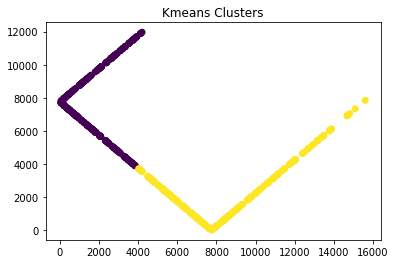

In [49]:
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')
plt.show()

In [93]:
numeric_cols = ['G', 'PA', 'HR', 'R', 'RBI', 'SB', 'BB', 'K', 'ISO',
       'BABIP', 'AVG', 'OBP', 'SLG', 'OPS', 'wOBA', 'WRCplus', 'WAR']

In [94]:
data = baseball_df[numeric_cols]

In [95]:
train = data.sample(frac=0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

In [98]:
x_train = train[attributes]
y_train = train['OPS']

x_test = test[attributes]
y_test = test['OPS']

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [99]:
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [100]:
mae = mean_absolute_error(y_test, predictions)

In [101]:
print(mae)

0.0002917974961202023


In [102]:
print(predictions)

[1.03177578 0.9999676  1.0307804  0.98414668 1.00971082 0.95198533
 1.00697114 0.98510181 0.95726377 0.94475166 0.95695018 0.93578671
 0.93903882 0.90109227 0.89067704 0.93158481 0.88643323 0.9151147
 0.89888074 0.91493359 0.88885149 0.86229171 0.85989047 0.86998002
 0.87902619 0.88400011 0.87978502 0.85695928 0.86115212 0.88609725
 0.8639426  0.87234649 0.88306379 0.83797095 0.87452951 0.85401648
 0.83788968 0.85388518 0.83693425 0.83008892 0.87683115 0.84991045
 0.84994351 0.82999513 0.83453178 0.81094995 0.83827561 0.86987047
 0.81199009 0.84583868 0.8385581  0.8468473  0.87023327 0.85034094
 0.81760974 0.8479485  0.82998671 0.82427685 0.83195751 0.84491637
 0.84092102 0.82694842 0.82662137 0.82497728 0.81987955 0.81793788
 0.80292517 0.80864097 0.80081638 0.81866914 0.81000231 0.80699758
 0.79199174 0.81595135 0.8178626  0.80798456 0.80587736 0.80995187
 0.82292855 0.7939445  0.79911202 0.80999457 0.82101447 0.80587037
 0.80996238 0.80681262 0.80984606 0.83098148 0.79622032 0.78695

In [103]:
test_2021 = pd.read_csv('baseball_data_2021.csv')

In [104]:
test_2021 = test_2021.drop(columns=['Team'])
test_2021 = test_2021.rename(columns={'BB%':'BB', 'K%':'K', 'wRC+':'WRCplus'})

In [105]:
test_2021['BB'] = test_2021['BB'].str.replace('%', '')
test_2021['K'] = test_2021['K'].str.replace('%', '')

In [106]:
test_2021 = test_2021.drop(columns='Name')

In [107]:
test_2021 = test_2021.drop(columns='playerid')

In [108]:
test_2021.head(5)

,G,PA,HR,R,RBI,BB,K,ISO,BABIP,AVG,OBP,SLG,OPS,wOBA,WRCplus,WAR
0,141,599,35,101,84,16.7,22.4,0.305,0.359,0.309,0.429,0.615,1.044,0.431,170,6.5
1,151,654,29,111,95,22.2,14.2,0.221,0.332,0.313,0.465,0.534,0.999,0.420,163,7.0
2,161,698,48,123,111,12.3,15.8,0.290,0.313,0.311,0.401,0.601,1.002,0.419,166,6.3
3,130,546,42,99,97,11.4,28.0,0.328,0.324,0.282,0.364,0.611,0.975,0.403,156,7.3
4,158,639,46,103,100,15.0,29.6,0.335,0.303,0.257,0.372,0.592,0.965,0.393,152,5.1


In [109]:
predictions2 = lr.predict(test_2021)

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- OPS
Feature names seen at fit time, yet now missing:
- SB

  warnings.warn(message, FutureWarning)


In [110]:
print(predictions2)

[1.57058125 1.4632347  1.50392404 1.48734763 1.45756348 1.40630922
 1.43310001 1.38739431 1.38651991 1.37259972 1.40499138 1.36121275
 1.38642189 1.37245045 1.33614293 1.32958265 1.35802079 1.35190584
 1.32977932 1.34850873 1.33416697 1.32837617 1.32000972 1.33531451
 1.33443882 1.30057909 1.32085033 1.26851542 1.2686798  1.32340634
 1.27430639 1.30283631 1.26367564 1.24806702 1.29797825 1.31892179
 1.24137816 1.2985618  1.25612641 1.25778348 1.24772191 1.26136902
 1.21702666 1.23108738 1.23028571 1.25638594 1.24057877 1.24726313
 1.25301403 1.19447011 1.17736214 1.20086279 1.25618809 1.24161347
 1.2412379  1.19946027 1.2579682  1.24243531 1.21042926 1.19895298
 1.16445635 1.17766725 1.21881145 1.16090273 1.18505231 1.17623531
 1.17858857 1.14286432 1.15993588 1.21654162 1.21439997 1.18060927
 1.18149983 1.21779288 1.15306229 1.1916707  1.17903807 1.16840665
 1.18503449 1.09406004 1.19531599 1.13548543 1.18423175 1.11017379
 1.1697395  1.13871568 1.16190732 1.15875439 1.13985701 1.1472

In [67]:
from sklearn.linear_model import RidgeCV

In [68]:
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(x_train, y_train)
predictions_rrm = rrm.predict(x_test)

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [69]:
mae_rrm = mean_absolute_error(y_test, predictions_rrm)

In [70]:
print(mae_rrm)

0.0013284931609276072
